# OBJECTIVE:
  ### 1.APPLY AGLOMERATIVE CLUSTERING ON FINE FOOD REVIEWS DATASET 
 
 ### 2.FORMING CLUSTERS WITH AVG WORD2VEC VECTORIZATION
 
### 3 TRYING WITH DIFFERENT VALUES OF CLUSTERS SUCH AS 3 , 5 
 
### 4  GETTING THE WORDS IN THE CLUSTER AND REPRESENTING EACH CLUSTER WORDS
 
 
  

In [2]:
from sklearn.model_selection import train_test_split  #importing the necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import *
from sklearn import naive_bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from sklearn import *
import warnings
warnings.filterwarnings("ignore")
from gensim.models import Word2Vec
from tqdm import tqdm


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')#geeting the content from the google drive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
final_processed_data=pd.read_csv("gdrive/My Drive/final_new_data.csv")#loading the preprocessed data  with 100k points into dataframe 

In [0]:
data=final_processed_data.sample(3000)# taking sample data

In [6]:
print("shape of our new data is ",data.shape)#printing the shape
print("data is as follows:")
print(data.head())#printing 

shape of our new data is  (3000, 2)
data is as follows:
       Score                                        CleanedText
45100      1  like rememb chocol marshmallow coconut also vi...
61371      1  stori peach flavor good tast littl pricey hard...
80033      1  sinc product agav plant safer choic need care ...
62090      1  bit worri review read amazon bonsai arriv pict...
71562      1  friend gave first flake year ago father brough...


In [7]:
list_of_sent=[]
for sent in data['CleanedText'] :
 list_of_sent.append(sent.split())#splitting of sentences into words AND appending them to list
print(list_of_sent[0])
word_to_vector=Word2Vec(list_of_sent,min_count=50,size=50,workers=3)#constructing my our word to vector
w_t_c_words=list(word_to_vector.wv.vocab)
print("***********************************************************************")
print("sample words ", w_t_c_words[0:50])

['like', 'rememb', 'chocol', 'marshmallow', 'coconut', 'also', 'virtual', 'imposs', 'find', 'store', 'buy', 'wont', 'disappoint']
***********************************************************************
sample words  ['like', 'chocol', 'also', 'find', 'store', 'buy', 'wont', 'disappoint', 'flavor', 'good', 'tast', 'littl', 'hard', 'come', 'compani', 'dont', 'make', 'product', 'kind', 'diet', 'ice', 'tea', 'mix', 'think', 'look', 'either', 'noth', 'sinc', 'choic', 'need', 'care', 'sugar', 'wonder', 'realli', 'know', 'could', 'differ', 'regular', 'water', 'consist', 'nice', 'use', 'syrup', 'sweet', 'sweeten', 'stuff', 'great', 'bit', 'review', 'read']


In [8]:
###### NOW STARTING AVERAGE WORD TO VEC FOR TRAIN DATA#################################################################
train_sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
 sent_vec = np.zeros(50) # as word vectors are of zero length
 cnt_words =0; # num of words with a valid vector in the sentence/review
 for word in sent: # for each word in a review/sentence
   if word in w_t_c_words:
     vec = word_to_vector.wv[word]
     sent_vec += vec
     cnt_words += 1
 if cnt_words != 0:
  sent_vec /= cnt_words
 train_sent_vectors.append(sent_vec)
print(len(train_sent_vectors))
print(len(train_sent_vectors[0]))

100%|██████████| 3000/3000 [00:00<00:00, 3707.43it/s]

3000
50


# APPLYING MODEL WITH N_CLUSTERS=3

In [9]:
#APPLYING AGLOMERATIVE CLUSTERING WITH N_CLUSTERS AS 3
%%time
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=3).fit(train_sent_vectors)
clustering = model.labels_
print (clustering)   

[1 2 0 ... 0 1 0]
CPU times: user 547 ms, sys: 38.7 ms, total: 585 ms
Wall time: 595 ms


In [10]:
# here appending a new column clusters in our dataset to get cluster 
data['Cluster'] = clustering
print(data.head())


       Score                                        CleanedText  Cluster
45100      1  like rememb chocol marshmallow coconut also vi...        1
61371      1  stori peach flavor good tast littl pricey hard...        2
80033      1  sinc product agav plant safer choic need care ...        0
62090      1  bit worri review read amazon bonsai arriv pict...        1
71562      1  friend gave first flake year ago father brough...        0


In [11]:
#creating a new dataframe new_data so that varoius operations could be performed on it wothout affecting ou original dataframe 
new_data=data.copy()
print(new_data.head())

       Score                                        CleanedText  Cluster
45100      1  like rememb chocol marshmallow coconut also vi...        1
61371      1  stori peach flavor good tast littl pricey hard...        2
80033      1  sinc product agav plant safer choic need care ...        0
62090      1  bit worri review read amazon bonsai arriv pict...        1
71562      1  friend gave first flake year ago father brough...        0


In [0]:
# here we are appending words to clusters from  word_to_vec words dictionary of words
i=0;
cluster_0=[]
cluster_1=[]
cluster_2=[]
for line in list_of_sent[:2999]:
    i=i+1;
    for each_word in line:
       for word in  w_t_c_words:
          if word==each_word:
            c=new_data['Cluster'][i:i+1].iloc[0]
            if c==0:
               cluster_0.append(word);
            if c==1:
               cluster_1.append(word);
            if c==2:
               cluster_2.append(word);
            break; 
       break; 
              

######################################################################
WORDS FOR CLUSTER 0 ARE:::


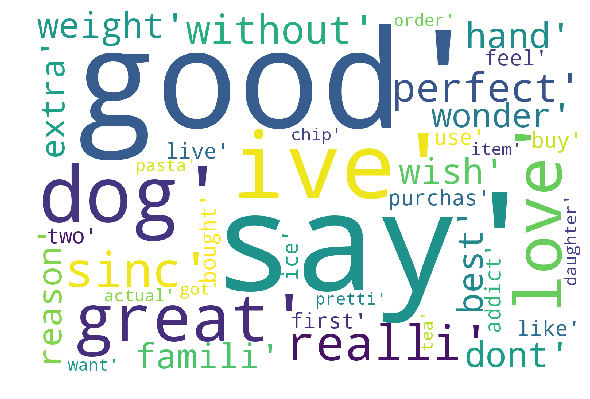

In [70]:
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(cluster_0[:50])) 
  
# plot the WordCloud image 
print("######################################################################")
print("WORDS FOR CLUSTER 0 ARE:::")
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


### CLUSTER 0 CONTAIN WORDS FOR ATTRIBUTES OF ITMES SUCH AS GOOD,GREAT,WEIGHT,LOVE

######################################################################
WORDS FOR CLUSTER 1 ARE:::


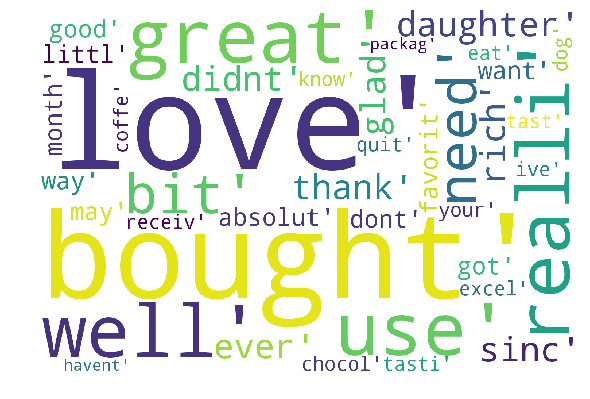

In [71]:
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(cluster_1[:50])) 
  
# plot the WordCloud image 
print("######################################################################")
print("WORDS FOR CLUSTER 1 ARE:::")
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### CLUSTER 1 CONTIAINS WORDS RELATED TO PERSON AS DAUGHTER,RICH,HAVE'NT

######################################################################
WORDS FOR CLUSTER 2 ARE:::


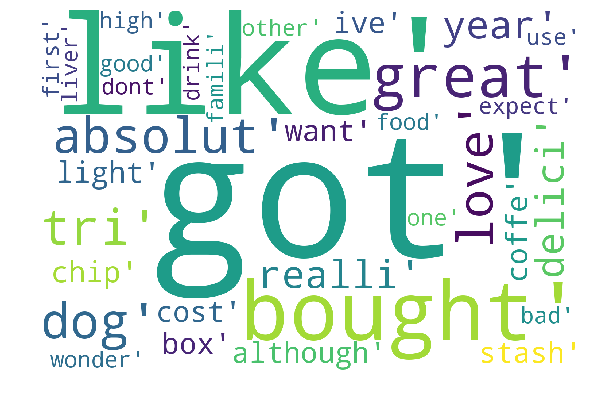

######################################################################


In [72]:
#here we are printing the top features using wordcloud library
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(cluster_2[:50])) 
  
# plot the WordCloud image 
print("######################################################################")
print("WORDS FOR CLUSTER 2 ARE:::")
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
print("######################################################################")

## CLUSTER 2 CONTIAN FOOD RELATES WORDS SUCH AS BOUGHT,GOT,GREAT,COFFFE

# APPLYING MODEL WITH N_CLUSTERS=5

In [54]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=5).fit(train_sent_vectors)
clustering = model.labels_
print (clustering)

[4 2 3 ... 1 4 3]


In [55]:
data['Cluster'] = clustering
print(data.head())

       Score                                        CleanedText  Cluster
45100      1  like rememb chocol marshmallow coconut also vi...        4
61371      1  stori peach flavor good tast littl pricey hard...        2
80033      1  sinc product agav plant safer choic need care ...        3
62090      1  bit worri review read amazon bonsai arriv pict...        0
71562      1  friend gave first flake year ago father brough...        1


In [56]:
new_data=data.copy()
print(new_data.head())

       Score                                        CleanedText  Cluster
45100      1  like rememb chocol marshmallow coconut also vi...        4
61371      1  stori peach flavor good tast littl pricey hard...        2
80033      1  sinc product agav plant safer choic need care ...        3
62090      1  bit worri review read amazon bonsai arriv pict...        0
71562      1  friend gave first flake year ago father brough...        1


In [0]:
i=0;
cluster_0=[]
cluster_1=[]
cluster_2=[]
cluster_3=[]
cluster_4=[]
for line in list_of_sent[:2999]:
    i=i+1;
    for each_word in line:
       for word in  w_t_c_words:
          if word==each_word:
            c=new_data['Cluster'][i:i+1].iloc[0]
            if c==0:
               cluster_0.append(word);
            if c==1:
               cluster_1.append(word);
            if c==2:
               cluster_2.append(word);
            if c==3:
               cluster_3.append(word);
            if c==4:
               cluster_4.append(word); 
            
            break; 
       break; 

In [60]:
print(' total words in cluster 0 are ',len(cluster_0))
print(' total words in cluster 1 are ',len(cluster_1))
print(' total words in cluster 2 are ',len(cluster_2))
print(' total words in cluster 3 are ',len(cluster_3))
print(' total words in cluster 4 are ',len(cluster_4))


 total words in cluster 0 are  274
 total words in cluster 1 are  670
 total words in cluster 2 are  367
 total words in cluster 3 are  377
 total words in cluster 4 are  529


######################################################################
WORDS FOR CLUSTER 0 ARE:::


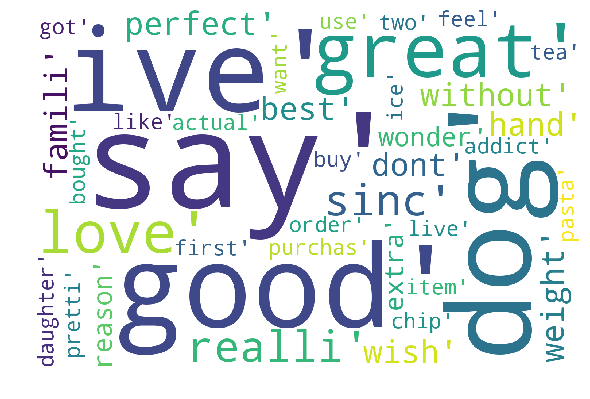

######################################################################


In [74]:
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(cluster_0[:50])) 
  
# plot the WordCloud image  
print("######################################################################")
print("WORDS FOR CLUSTER 0 ARE:::")

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()
print("######################################################################")

### CLUSTER 0 CONTAIN WORDS FOR ATTRIBUTES OF ITMES SUCH AS GOOD,GREAT,WEIGHT,LOVE

######################################################################
WORDS FOR CLUSTER 1 ARE:::


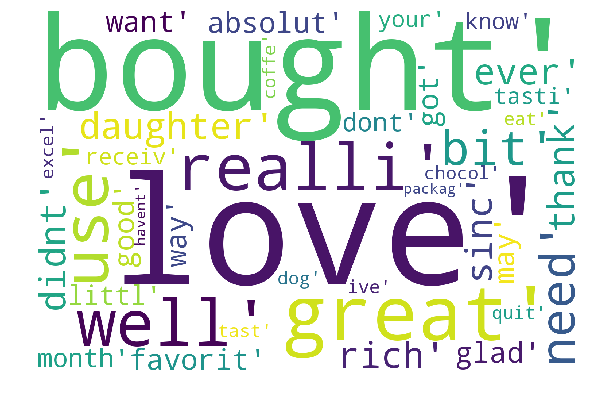

######################################################################


In [73]:
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(cluster_1[:50])) 
  
# plot the WordCloud image  
print("######################################################################")
print("WORDS FOR CLUSTER 1 ARE:::")
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 
print("######################################################################")

### CLUSTER 1 CONTIAINS WORDS RELATED TO PERSON AS DAUGHTER,RICH

######################################################################
WORDS FOR CLUSTER 2 ARE:::


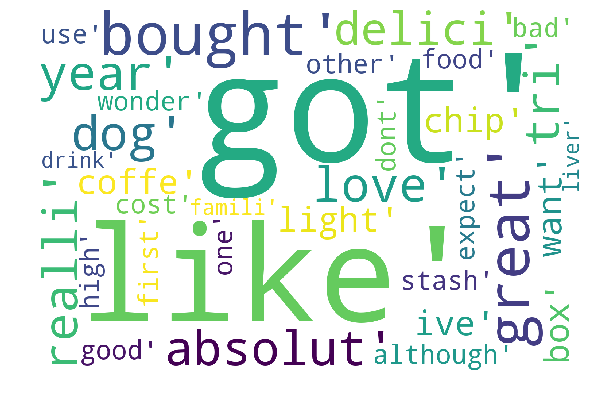

######################################################################


In [69]:
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(cluster_2[:50])) 
  
# plot the WordCloud image
print("######################################################################")
print("WORDS FOR CLUSTER 2 ARE:::")
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
print("######################################################################")

######################################################################
WORDS FOR CLUSTER 3 ARE:::


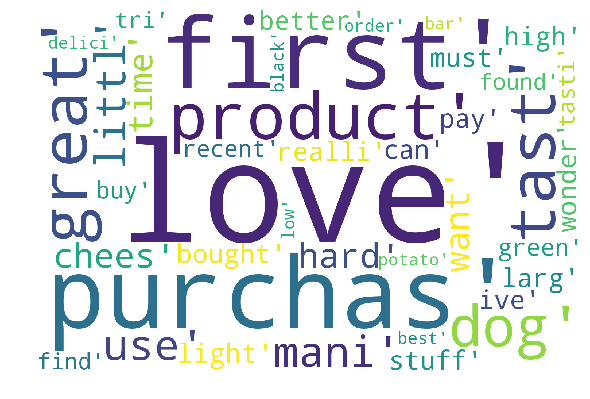

######################################################################


In [68]:
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(cluster_3[:50])) 
  
# plot the WordCloud image 
print("######################################################################")
print("WORDS FOR CLUSTER 3 ARE:::")
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
print("######################################################################")

######################################################################
WORDS FOR CLUSTER 4 ARE:::


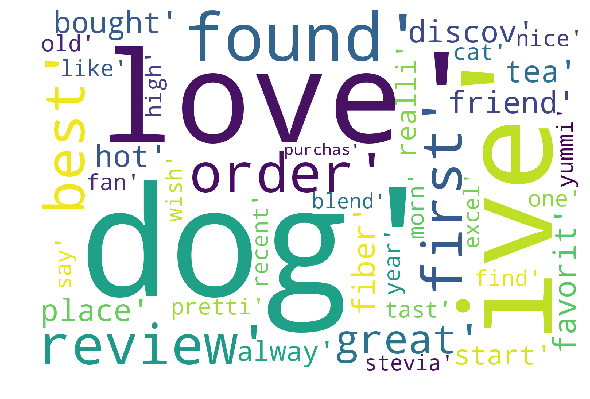

######################################################################


In [67]:
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(cluster_4[:50])) 
  
# plot the WordCloud image 
print("######################################################################")
print("WORDS FOR CLUSTER 4 ARE:::")
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
print("######################################################################")

# OBJECTIVE:
  1.APPLY AGLOMERATIVE CLUSTERING ON FINE FOOD REVIEWS DATASET 
 
 2.FORMING CLUSTERS WITH TDIDF WORD2VEC VECTORIZATION
 
 3.GETTING THE WORDS IN THE CLUSTER AND REPRESENTING EACH CLUSTER WORDS 
    USING WORDCLOUD

In [77]:
# Training my own Word2Vec model using your own text corpus
list_of_sent=[]
for sent in data['CleanedText']:
 list_of_sent.append(sent.split())#splitting of sentences into words AND appending them to list
print(list_of_sent[0])
word_to_vector=Word2Vec(list_of_sent,min_count=50,size=100,workers=2)#constructing my our word to vector
w_t_c_words=list(word_to_vector.wv.vocab)
print("***********************************************************************")
print("sample words ", w_t_c_words[0:20])

['like', 'rememb', 'chocol', 'marshmallow', 'coconut', 'also', 'virtual', 'imposs', 'find', 'store', 'buy', 'wont', 'disappoint']
***********************************************************************
sample words  ['like', 'chocol', 'also', 'find', 'store', 'buy', 'wont', 'disappoint', 'flavor', 'good', 'tast', 'littl', 'hard', 'come', 'compani', 'dont', 'make', 'product', 'kind', 'diet']


In [78]:
###### NOW STARTING TFIDF WORD TO VEC FOR TRAIN DATA#################################################################
#NOW STARTING TF-IDF WEIGHTED WORD-TO-VEC
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(data['CleanedText'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))
train_tfidf_sent_vectors =[]# the tfidf-w2v for each sentence/review is stored in this list

for sent in tqdm(list_of_sent): # for each review/sentence
  sent_vec = np.zeros(100) # as word vectors are of zero length
  weight_sum =0; # num of words with a valid vector in the sentence/review
  for word in sent: # for each word in a review/sentence
   if word in w_t_c_words:
     vec = word_to_vector.wv[word]
     tf_idf = dictionary[word]*(sent.count(word)/len(sent))# dictionary[word] = idf value of word in whole courpus
     sent_vec += (vec * tf_idf)# sent.count(word) = tf valeus of word in this review
     weight_sum += tf_idf 
  if weight_sum != 0:
   sent_vec /= weight_sum
   train_tfidf_sent_vectors.append(sent_vec)

100%|██████████| 3000/3000 [00:01<00:00, 2545.71it/s]


# APPLYING MODEL WITH N_CLUSTERS=3

In [79]:
#APPLYING AGLOMERATIVE CLUSTERING WITH N_CLUSTERS AS 3
%%time
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=3).fit(train_tfidf_sent_vectors)
clustering = model.labels_
print (clustering)   

[0 2 2 ... 2 0 1]
CPU times: user 625 ms, sys: 11.8 ms, total: 637 ms
Wall time: 641 ms


In [80]:
# here appending a new column clusters in our dataset to get cluster 
data['Cluster'] = clustering
print(data.head())


       Score                                        CleanedText  Cluster
45100      1  like rememb chocol marshmallow coconut also vi...        0
61371      1  stori peach flavor good tast littl pricey hard...        2
80033      1  sinc product agav plant safer choic need care ...        2
62090      1  bit worri review read amazon bonsai arriv pict...        0
71562      1  friend gave first flake year ago father brough...        2


In [81]:
#creating a new dataframe new_data so that varoius operations could be performed on it wothout affecting ou original dataframe 
new_data=data.copy()
print(new_data.head())

       Score                                        CleanedText  Cluster
45100      1  like rememb chocol marshmallow coconut also vi...        0
61371      1  stori peach flavor good tast littl pricey hard...        2
80033      1  sinc product agav plant safer choic need care ...        2
62090      1  bit worri review read amazon bonsai arriv pict...        0
71562      1  friend gave first flake year ago father brough...        2


In [0]:
# here we are appending words to each clusters through w_t_v_words
i=0;
cluster_0=[]
cluster_1=[]
cluster_2=[]
for line in list_of_sent[:2999]:
    i=i+1;
    for each_word in line:
       for word in  w_t_c_words:
          if word==each_word:
            c=new_data['Cluster'][i:i+1].iloc[0]
            if c==0:
               cluster_0.append(word);
            if c==1:
               cluster_1.append(word);
            if c==2:
               cluster_2.append(word);
            break; 
       break; 
              

######################################################################
WORDS FOR CLUSTER 0 ARE:::


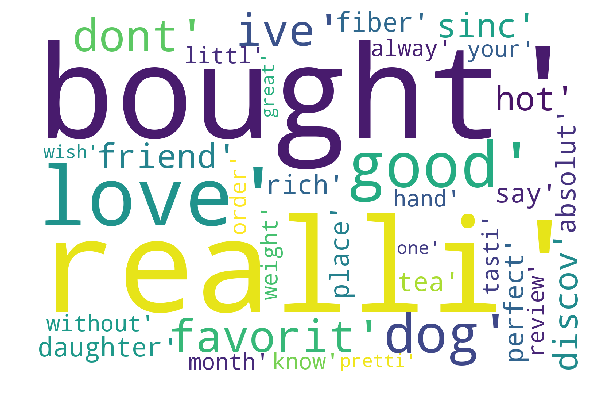

In [83]:
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(cluster_0[:50])) 
  
# plot the WordCloud image 
print("######################################################################")
print("WORDS FOR CLUSTER 0 ARE:::")
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 


######################################################################
WORDS FOR CLUSTER 0 ARE:::


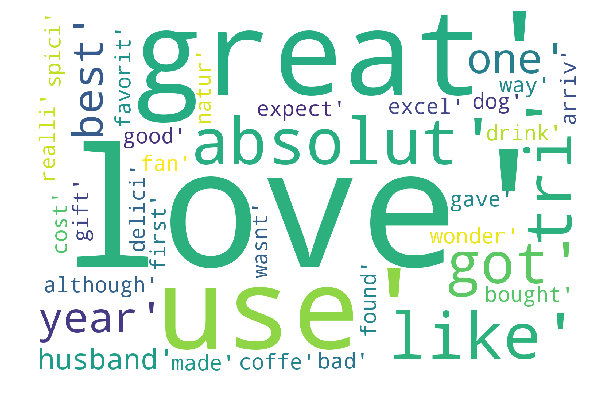

In [84]:
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(cluster_1[:50])) 
  
# plot the WordCloud image 
print("######################################################################")
print("WORDS FOR CLUSTER 0 ARE:::")
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 


######################################################################
WORDS FOR CLUSTER 0 ARE:::


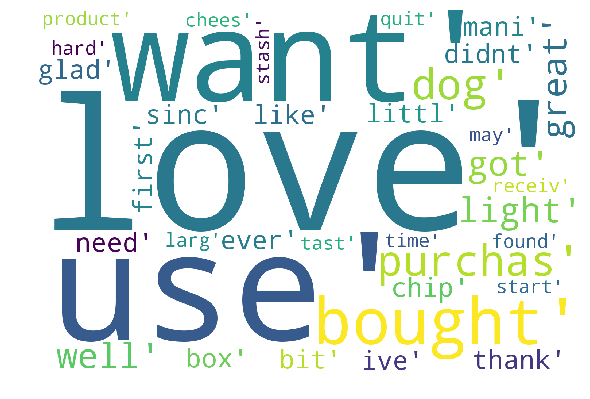

In [85]:
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(cluster_2[:50])) 
  
# plot the WordCloud image 
print("######################################################################")
print("WORDS FOR CLUSTER 0 ARE:::")
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 


# APPLYING MODEL FOR 5 CLUSTERS

In [87]:
#APPLYING AGLOMERATIVE CLUSTERING WITH N_CLUSTERS AS 5
%%time
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=5).fit(train_tfidf_sent_vectors)
clustering = model.labels_
print (clustering)

[3 2 2 ... 2 3 1]


In [88]:
data['Cluster'] = clustering
print(data.head())

       Score                                        CleanedText  Cluster
45100      1  like rememb chocol marshmallow coconut also vi...        3
61371      1  stori peach flavor good tast littl pricey hard...        2
80033      1  sinc product agav plant safer choic need care ...        2
62090      1  bit worri review read amazon bonsai arriv pict...        0
71562      1  friend gave first flake year ago father brough...        2


In [89]:
#creating a new dataframe new_data so that varoius operations could be performed on it wothout affecting ou original dataframe 
new_data=data.copy()
print(new_data.head())

       Score                                        CleanedText  Cluster
45100      1  like rememb chocol marshmallow coconut also vi...        3
61371      1  stori peach flavor good tast littl pricey hard...        2
80033      1  sinc product agav plant safer choic need care ...        2
62090      1  bit worri review read amazon bonsai arriv pict...        0
71562      1  friend gave first flake year ago father brough...        2


In [0]:
i=0;
cluster_0=[]
cluster_1=[]
cluster_2=[]
cluster_3=[]
cluster_4=[]
for line in list_of_sent[:2999]:
    i=i+1;
    for each_word in line:
       for word in  w_t_c_words:
          if word==each_word:
            c=new_data['Cluster'][i:i+1].iloc[0]
            if c==0:
               cluster_0.append(word);
            if c==1:
               cluster_1.append(word);
            if c==2:
               cluster_2.append(word);
            if c==3:
               cluster_3.append(word);
            if c==4:
               cluster_4.append(word); 
            
            break; 
       break; 

In [91]:
print(' total words in cluster 0 are ',len(cluster_0))
print(' total words in cluster 1 are ',len(cluster_1))
print(' total words in cluster 2 are ',len(cluster_2))
print(' total words in cluster 3 are ',len(cluster_3))
print(' total words in cluster 4 are ',len(cluster_4))


 total words in cluster 0 are  383
 total words in cluster 1 are  226
 total words in cluster 2 are  917
 total words in cluster 3 are  653
 total words in cluster 4 are  38


# REPRESENTING WORDS FOR DIFFERNET CLUSTERS 

######################################################################
WORDS FOR CLUSTER 0 ARE:::


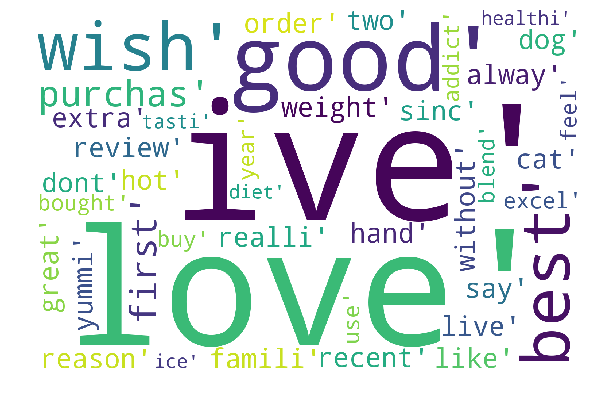

In [92]:
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(cluster_0[:50])) 
  
# plot the WordCloud image 
print("######################################################################")
print("WORDS FOR CLUSTER 0 ARE:::")
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 


## CLUSTER 0 CONTIAN TASTE RELATED TO PRODUCTS SUCH AS YUMMI, BEST,HOT

######################################################################
WORDS FOR CLUSTER 1 ARE:::


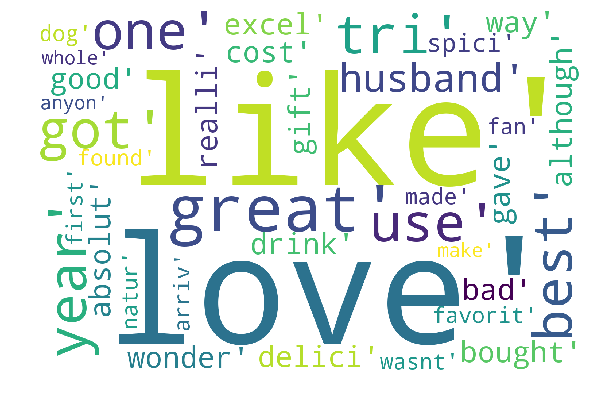

In [93]:
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(cluster_1[:50])) 
  
# plot the WordCloud image 
print("######################################################################")
print("WORDS FOR CLUSTER 1 ARE:::")
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## CLUSTER 1 CONTIAN  PRODUCT ATTRIBUTES SUCH AS COST,ARRIVE,BOUGHT

######################################################################
WORDS FOR CLUSTER 2 ARE:::


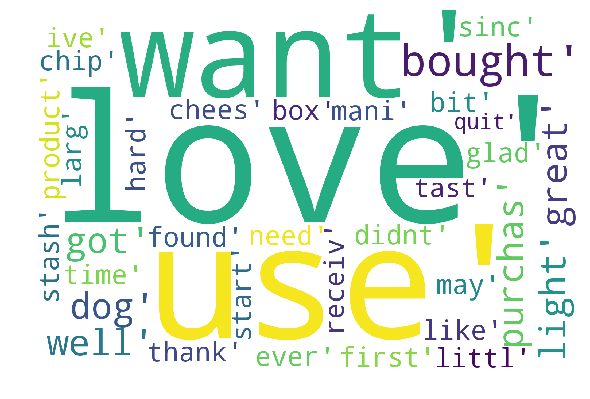

In [97]:
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(cluster_2[:50])) 
  
# plot the WordCloud image 
print("######################################################################")
print("WORDS FOR CLUSTER 2 ARE:::")
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## CLUSTER 2 CONTIAN  FOOD RELATED WORDS SUCH AS CHEESE, CHIPS,TASTY,PRODUCT

######################################################################
WORDS FOR CLUSTER 3 ARE:::


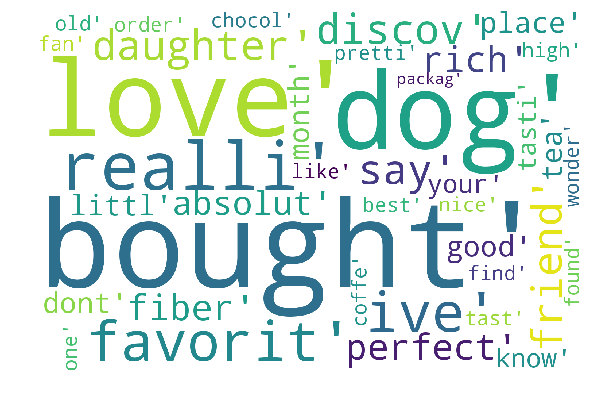

In [96]:
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(cluster_3[:50])) 
  
# plot the WordCloud image 
print("######################################################################")
print("WORDS FOR CLUSTER 3 ARE:::")
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## CLUSTER 3 CONTIAN PERSON ATTRIBUTES SUCH AS FRIEND, DAUGHTER,RICH,PRETTI

######################################################################
WORDS FOR CLUSTER 4 ARE:::


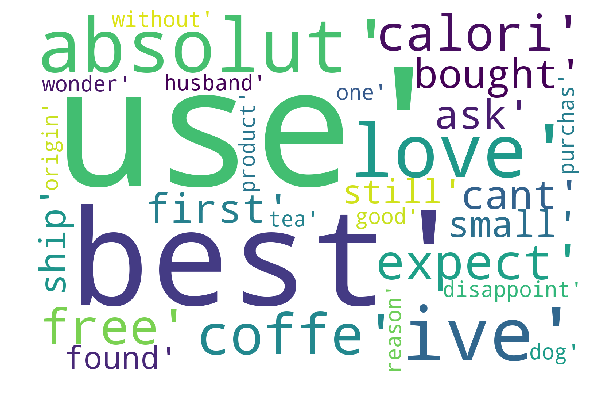

In [98]:
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(cluster_4[:50])) 
  
# plot the WordCloud image 
print("######################################################################")
print("WORDS FOR CLUSTER 4 ARE:::")
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### CLUSTER 4 CONTAINS STATES OF PERSON SUCH AS WONDER,DISAPPOINT,EXPECT

In [100]:
print("##############################completed###########################################")

##############################completed###########################################


# AGLOMERATIVE CLUSTERING IS FINISHED FOR BOTH AVG WORD2VEC AND TFIDF WORD2VECTORIZATION 